# Training Data Inspector

Interactive notebook to explore training data downloaded from Modal volume.

Make sure you've downloaded the data first:
```bash
modal volume get pile-dataset-cache training_data.pkl ./training_data.pkl
```

In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
from typing import List

## Load Training Data

In [14]:
# Load the training data
file_path = "training_data.pkl"  # Adjust path if needed

try:
    with open(file_path, "rb") as f:
        training_data = pickle.load(f)
    print(f"✅ Loaded {len(training_data)} training samples")
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    print("Download first with: modal volume get pile-dataset-cache training_data.pkl ./training_data.pkl")
    training_data = []

✅ Loaded 4466 training samples


## Dataset Statistics

In [16]:
if training_data:
    # Basic stats
    char_lengths = [len(text) for text in training_data]
    word_lengths = [len(text.split()) for text in training_data]
    
    print(f"📊 Dataset Statistics:")
    print(f"   Total samples: {len(training_data):,}")
    print(f"   Total characters: {sum(char_lengths):,}")
    print(f"   Total words: {sum(word_lengths):,}")
    print(f"")
    print(f"   Character length:")
    print(f"     Mean: {np.mean(char_lengths):.1f}")
    print(f"     Median: {np.median(char_lengths):.1f}")
    print(f"     Min: {min(char_lengths)}")
    print(f"     Max: {max(char_lengths):,}")
    print(f"")
    print(f"   Word count:")
    print(f"     Mean: {np.mean(word_lengths):.1f}")
    print(f"     Median: {np.median(word_lengths):.1f}")
    print(f"     Min: {min(word_lengths)}")
    print(f"     Max: {max(word_lengths):,}")

📊 Dataset Statistics:
   Total samples: 4,466
   Total characters: 25,591,622
   Total words: 4,341,885

   Character length:
     Mean: 5730.3
     Median: 5438.0
     Min: 3538
     Max: 10,333

   Word count:
     Mean: 972.2
     Median: 919.0
     Min: 700
     Max: 1,500


## Length Distribution Plots

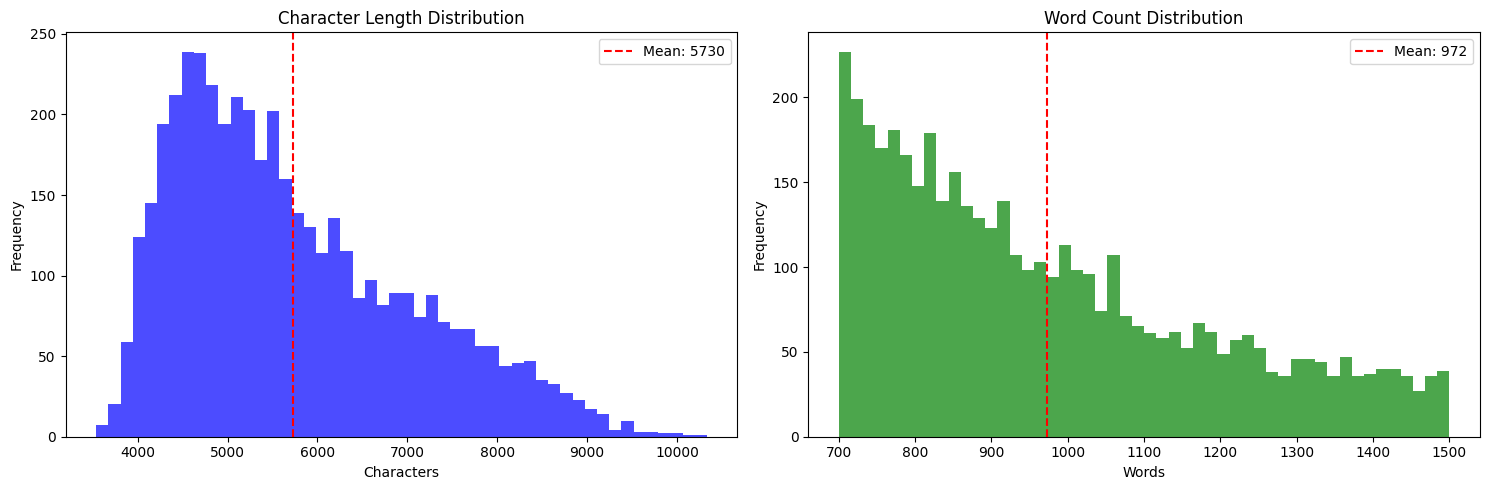

In [17]:
if training_data:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Character length distribution
    ax1.hist(char_lengths, bins=50, alpha=0.7, color='blue')
    ax1.set_xlabel('Characters')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Character Length Distribution')
    ax1.axvline(np.mean(char_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(char_lengths):.0f}')
    ax1.legend()
    
    # Word count distribution
    ax2.hist(word_lengths, bins=50, alpha=0.7, color='green')
    ax2.set_xlabel('Words')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Word Count Distribution')
    ax2.axvline(np.mean(word_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(word_lengths):.0f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

## Sample Texts

In [18]:
# Show first few samples
if training_data:
    num_samples = 3
    print(f"📝 First {num_samples} samples:")
    
    for i, text in enumerate(training_data[:num_samples]):
        print(f"\n{'='*50}")
        print(f"Sample {i+1}")
        print(f"Length: {len(text)} chars, {len(text.split())} words")
        print(f"{'='*50}")
        print(text[:500] + ("..." if len(text) > 500 else ""))

📝 First 3 samples:

Sample 1
Length: 4218 chars, 748 words
Are film trailers spoiling movies?
In April we asked if high ticket prices were ruining your visits to the cinema. Yes, you said overwhelmingly. But something else has put a strain on my relationship with the cinema – and it’s not the popcorn.
Have you ever gone to your local cinema to watch a new film only to feel you’ve seen it before? I know I have. ‘Spoilerific’ film trailers are now often so detailed it seems hardly worth watching the movie itself.
Imagine if the trailer for Casablanca told...

Sample 2
Length: 7522 chars, 1196 words
Quartz is one of the most common and varied minerals on earth, and its abundant colors produce many gemstone types. Amethyst and Citrine are the most popular and valuable gem varieties of Quartz, but other forms also make important gemstones. Chalcedony describes any form of Quartz that is microcrystalline, in compact form without any visible crystals. Chalcedony also has several varieties use

## Interactive Sample Viewer

In [20]:
# Function to view specific sample
def view_sample(index: int):
    if not training_data:
        print("No training data loaded")
        return
    
    if 0 <= index < len(training_data):
        text = training_data[index]
        print(f"Sample {index}:")
        print(f"Length: {len(text)} chars, {len(text.split())} words")
        print(f"\n{text}")
    else:
        print(f"Index out of range. Available indices: 0-{len(training_data)-1}")

# Example usage:
# view_sample(0)  # View first sample
view_sample(10) # View 11th sample

Sample 10:
Length: 5019 chars, 838 words

Definitely my favorite restaurant in Macau. If you want to experience the authentic Portuguese Macanese dishes, with live one man band (sings with guitar) and cozy ambience. This is it. For extra boost to add on to your one-in-a-lifetime experience, try order Crepe suzette! 3-michelin-stars Chef Antonio himself will invite you to join him cooking at your table and be prepared for a fiery ride!
One of many Signature dish – Seafood rice!
It’s getting hot in here -Flaming Chouriço!
Cooking crepe suzette! Be careful with the alcohols!
Tadaaa! Proudly present Crepe suzette by Chef Antonio and Me!
Another popular local traditional Portuguese Macanese restaurant with more mature settings and environment.
The famous african chicken – this one’s a lil spicy! But superb!
Steamed clams! Make sure you dip the bread in the sauce! Yum!
Ended with my favorite traditional dessert in Macau! Serradura!
A cute romantic Portuguese-Macanese restaurant nearby the fa

## Search Functionality

In [21]:
def search_training_data(query: str, max_results: int = 5, context_chars: int = 200):
    """Search for text containing query and show context."""
    if not training_data:
        print("No training data loaded")
        return
    
    matches = []
    query_lower = query.lower()
    
    for i, text in enumerate(training_data):
        if query_lower in text.lower():
            matches.append((i, text))
            if len(matches) >= max_results:
                break
    
    print(f"🔍 Found {len(matches)} matches for '{query}' (showing first {max_results}):")
    
    for i, (idx, text) in enumerate(matches):
        # Find query position and show context
        pos = text.lower().find(query_lower)
        start = max(0, pos - context_chars//2)
        end = min(len(text), pos + len(query) + context_chars//2)
        context = text[start:end]
        
        print(f"\n--- Match {i+1} (Sample {idx}) ---")
        print(f"...{context}...")

# Example usage:
search_training_data("machine learning")
# search_training_data("python")

🔍 Found 5 matches for 'machine learning' (showing first 5):

--- Match 1 (Sample 39) ---
...e sustainable built environment, lies in the advances of sensor technology, big data gathering, and machine learning. Technology will enable us to move from big population models to tailor made solutions designed for...

--- Match 2 (Sample 184) ---
...e self-described "cutting edge artificial intelligence company" that uses "the best techniques from machine learning and systems neuroscience to build powerful general-purpose learning algorithms: comes with a team o...

--- Match 3 (Sample 399) ---
...ple has been consolidating its control over the chips embedded in its products to support graphics, machine learning and other tasks. Inside some of its latest iPhones is another custom chip, a new main power managem...

--- Match 4 (Sample 453) ---
...es the collective intelligence of cyber security specialists, as well as advanced technologies like machine learning and sandboxing to help crypto tr

## Most Common Words

In [ ]:
if training_data:
    # Extract all words and count them
    all_text = " ".join(training_data[:100])  # Use first 100 samples for speed
    words = re.findall(r'\b\w+\b', all_text.lower())
    
    word_counts = Counter(words)
    common_words = word_counts.most_common(20)
    
    print(f"📈 Most common words (from first 100 samples):")
    for word, count in common_words:
        print(f"   {word}: {count}")
        
    # Plot most common words
    words_list, counts_list = zip(*common_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words_list, counts_list)
    plt.xticks(rotation=45)
    plt.title('Most Common Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Export Sample for Analysis

In [8]:
# Export first N samples to text file for external analysis
def export_samples(num_samples: int = 10, output_file: str = "sample_data.txt"):
    if not training_data:
        print("No training data loaded")
        return
    
    with open(output_file, "w", encoding="utf-8") as f:
        for i, text in enumerate(training_data[:num_samples]):
            f.write(f"=== SAMPLE {i+1} ===\n")
            f.write(f"Length: {len(text)} chars, {len(text.split())} words\n")
            f.write(f"{text}\n\n")
    
    print(f"Exported {min(num_samples, len(training_data))} samples to {output_file}")

# Example usage:
export_samples(5, "first_5_samples.txt")

Exported 5 samples to first_5_samples.txt
